In [2]:
!pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 1.7 MB/s eta 0:00:0000:0100:010m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 1.5 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 325.0/325.0 KB 2.0 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 1.5 MB/s eta 0:00:0000:0100:01


In [4]:
!pip install seaborn pandas numpy

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 KB 1.7 MB/s eta 0:00:00a 0:00:01


In [9]:
import json
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


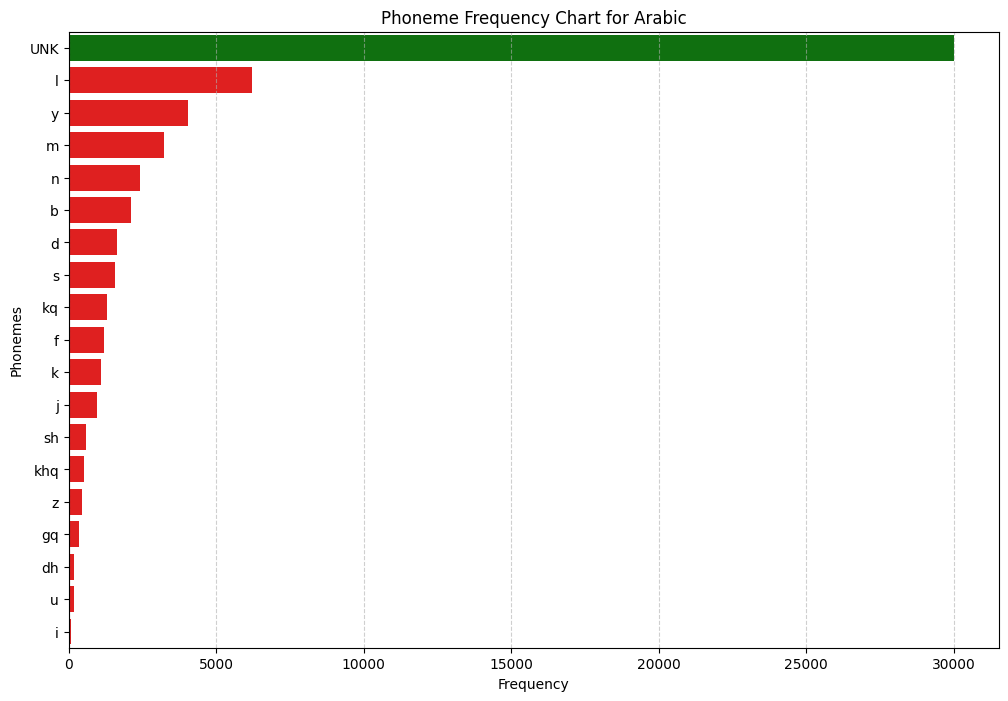

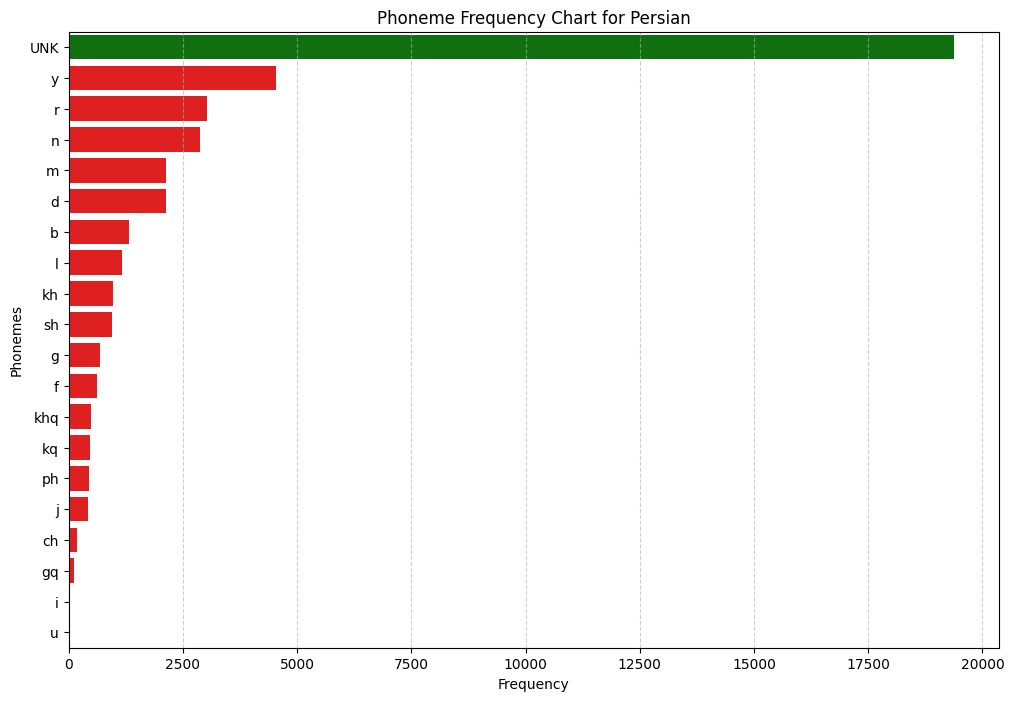

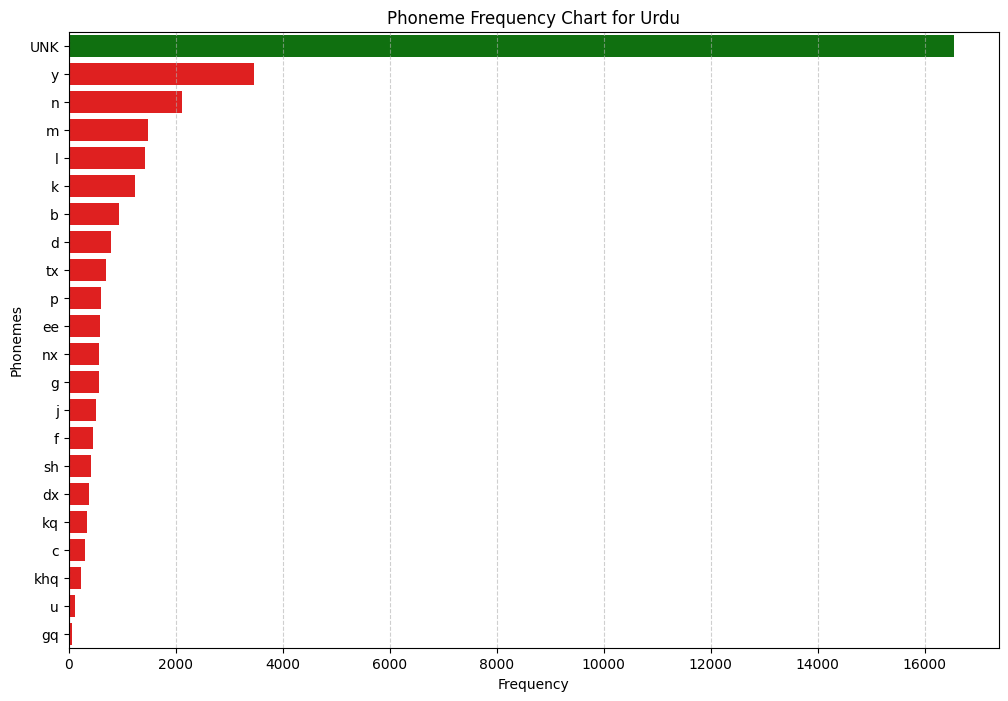

In [10]:
# Load common.map to get the mapping of phones
def load_common_map(file_path):
    common_map = {}
    with open(file_path, 'r', encoding='utf-8') as f:
        for line in f:
            parts = line.strip().split()
            if len(parts) == 2:
                common_map[parts[0]] = parts[1]
    return common_map

# Load parsed phoneme json files
def load_parsed_json(file_path):
    with open(file_path, 'r', encoding='utf-8') as f:
        data = json.load(f)
    return data

# Count phoneme frequencies
def count_phonemes(data):
    phoneme_counts = {}
    for word in data.values():
        for phoneme in word:
            phoneme_counts[phoneme] = phoneme_counts.get(phoneme, 0) + 1
    return phoneme_counts

# Classify phoneme counts into ranges
def classify_ranges(counts):
    values = counts.values()
    max_count = max(values)
    min_count = min(values)

    ranges = {}
    for phoneme, count in counts.items():
        if count >= (0.66 * max_count):
            ranges[phoneme] = 'green'
        elif count >= (0.33 * max_count):
            ranges[phoneme] = 'yellow'
        else:
            ranges[phoneme] = 'red'
    return ranges

# Visualize phonemes as IPA-like chart
def visualize_phoneme_chart(counts, color_ranges, language):
    df = pd.DataFrame({
        'Phoneme': list(counts.keys()),
        'Count': list(counts.values()),
        'Range': [color_ranges[p] for p in counts.keys()]
    })

    df = df.sort_values(by='Count', ascending=False).reset_index(drop=True)

    plt.figure(figsize=(12, 8))
    sns.barplot(
        x='Count', 
        y='Phoneme', 
        data=df, 
        hue='Range', 
        palette={'green':'green', 'yellow':'yellow', 'red':'red'},
        legend=False
    )
    plt.title(f'Phoneme Frequency Chart for {language}')
    plt.xlabel('Frequency')
    plt.ylabel('Phonemes')
    plt.grid(axis='x', linestyle='--', alpha=0.6)
    plt.show()

# Main function
def main():
    common_map_path = 'common.map'
    arabic_path = 'arabic_parsed.json'
    persian_path = 'persian_parsed.json'
    urdu_path = 'urdu_parsed.json'

    common_map = load_common_map(common_map_path)

    arabic_data = load_parsed_json(arabic_path)
    persian_data = load_parsed_json(persian_path)
    urdu_data = load_parsed_json(urdu_path)

    arabic_counts = count_phonemes(arabic_data)
    persian_counts = count_phonemes(persian_data)
    urdu_counts = count_phonemes(urdu_data)

    arabic_ranges = classify_ranges(arabic_counts)
    persian_ranges = classify_ranges(persian_counts)
    urdu_ranges = classify_ranges(urdu_counts)

    visualize_phoneme_chart(arabic_counts, arabic_ranges, 'Arabic')
    visualize_phoneme_chart(persian_counts, persian_ranges, 'Persian')
    visualize_phoneme_chart(urdu_counts, urdu_ranges, 'Urdu')

# Run script
main()
